In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import folium
import shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

ModuleNotFoundError: No module named 'tqdm'

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/final_df_4.csv')
df.head(10)

latitude  longitude  year  month  dayofweek     county  dist_from_water  \
0  36.56076 -118.76760  2006      6          1     Tulare             43.0   
1  37.77060 -119.51077  2007      9          4   Mariposa            185.0   
2  37.77060 -119.51077  2009      6          6   Mariposa            185.0   
3  37.66534 -119.72488  2007      9          5   Mariposa            185.0   
4  39.43248 -122.97443  2011      8          4       Lake            201.0   
5  41.73226 -124.07656  2007      4          2  Del Norte            273.0   
6  38.57647 -122.71056  2011     11          1     Sonoma            201.0   
7  36.59670 -118.71633  2003      6          5     Tulare             43.0   
8  37.73264 -119.56068  2009      4          3   Mariposa            185.0   
9  37.98040 -119.79161  2009      5          5   Tuolumne             19.0   

   landcode  dist_from_campsite  label  quadrat seasonality  
0        52            0.133035      1      198      Summer  
1        52            0.133892      1      181        Fall  
2        52            0.133892      1      181      Summer  
3        42            0.133940      1      162        Fall  
4        52            0.136146      0       51      Summer  
5        42            0.137637      1       18      Spring  
6        52            0.135656      1       69        Fall  
7        42            0.133028      1      198      Summer  
8        52            0.133898      1      162      Spring  
9        42            0.134108      1      162      Spring

In [45]:
min_lon, min_lat = (-124.41060660766607,32.5342307609976)  # Lower-left corner
max_lon, max_lat = (-114.13445790587905,42.00965914828148)  # Upper-right corner
#bbox = (min_lon, min_lat, max_lon, max_lat)


lon = np.linspace(min_lon, max_lon, 20)
lat = np.linspace(min_lat, max_lat, 20)

latlons = []
for i in range(len(lat)-1):
    for k in range(len(lon)-1):
        latlons.append((lat[k], lon[i], lat[k+1], lon[i+1]))


m = folium.Map(location=((min_lat+max_lat)/2,(min_lon+max_lon)/2), zoom_start=6)
# m = folium.Map(location=[37.16611, -119.44944], zoom_start=6.5)

for k in latlons:
    folium.Rectangle([(k[0], k[1]), (k[2], k[3])],
                     color='red',
                     fill='pink',
                     fill_opcity=0.5).add_to(m)
m

In [49]:
df = pd.read_csv('data/final_final_df.csv')
df.head()

latitude  longitude  year  month  dayofweek    county  dist_from_water  \
0  36.56076 -118.76760  2006      6          1    Tulare             43.0   
1  37.77060 -119.51077  2007      9          4  Mariposa            185.0   
2  37.77060 -119.51077  2009      6          6  Mariposa            185.0   
3  37.66534 -119.72488  2007      9          5  Mariposa            185.0   
4  39.43248 -122.97443  2011      8          4      Lake            201.0   

   landcode  dist_from_campsite  label  
0        52            0.133035      1  
1        52            0.133892      1  
2        52            0.133892      1  
3        42            0.133940      1  
4        52            0.136146      0

In [50]:
df['quadrat'] = ''

for j in tqdm(range(len(df))):
    point = Point(df.iloc[j,0],df.iloc[j,1])
    for i in range(len(latlons)):
        bbox = latlons[i]
        polygon = shapely.geometry.box(*bbox, ccw=True)
        if polygon.contains(point) == True:
            df.iloc[j,-1] = i
df.head()

100%|████████████████████████████████████| 82772/82772 [12:26<00:00, 110.87it/s]


latitude  longitude  year  month  dayofweek    county  dist_from_water  \
0  36.56076 -118.76760  2006      6          1    Tulare             43.0   
1  37.77060 -119.51077  2007      9          4  Mariposa            185.0   
2  37.77060 -119.51077  2009      6          6  Mariposa            185.0   
3  37.66534 -119.72488  2007      9          5  Mariposa            185.0   
4  39.43248 -122.97443  2011      8          4      Lake            201.0   

   landcode  dist_from_campsite  label quadrat  
0        52            0.133035      1     198  
1        52            0.133892      1     181  
2        52            0.133892      1     181  
3        42            0.133940      1     162  
4        52            0.136146      0      51

In [6]:
max(df['year'])

2022

In [51]:
df.to_csv('data/final_df_4.csv', index=False)

In [52]:
df.sort_values(by='quadrat', axis=0, inplace=True)

In [53]:
len(df['quadrat'].unique())

109

In [54]:
df.head()

latitude  longitude  year  month  dayofweek         county  \
43717  39.91336 -123.93734  2020      9          5  Santa Barbara   
82649  39.95719 -123.97462  2022     11          3            NaN   
43716  39.91336 -123.93734  2020      9          5  Santa Barbara   
82650  39.95719 -123.97462  2022     11          3            NaN   
82651  39.95719 -123.97462  2022     11          3            NaN   

       dist_from_water  landcode  dist_from_campsite  label quadrat  
43717            272.0        42            0.136781      1      14  
82649              NaN        11            0.136817      0      14  
43716            272.0        42            0.136781      1      14  
82650              NaN        11            0.136817      0      14  
82651              NaN        11            0.136817      0      14

In [55]:
df_counts = df['quadrat'].value_counts()
df_counts

34     12791
162     5372
212     4977
198     4974
164     4070
       ...  
89        16
213        9
113        9
211        2
232        2
Name: quadrat, Length: 109, dtype: int64

In [56]:
df_counts.sort_index(inplace=True)
df_counts = df_counts.to_frame()
df_counts

quadrat
14        57
15      1252
16      2307
17      1894
18       483
..       ...
232        2
249      180
250      991
268      273
269      490

[109 rows x 1 columns]

In [60]:
len(df)

82772

In [57]:
df_counts['prob'] = df_counts['quadrat'].apply(lambda x: x/len(df))
df_counts

quadrat      prob
14        57  0.000689
15      1252  0.015126
16      2307  0.027872
17      1894  0.022882
18       483  0.005835
..       ...       ...
232        2  0.000024
249      180  0.002175
250      991  0.011973
268      273  0.003298
269      490  0.005920

[109 rows x 2 columns]

In [59]:
max(df_counts['prob'])

0.15453293384236216

In [61]:
import plotly.express as px

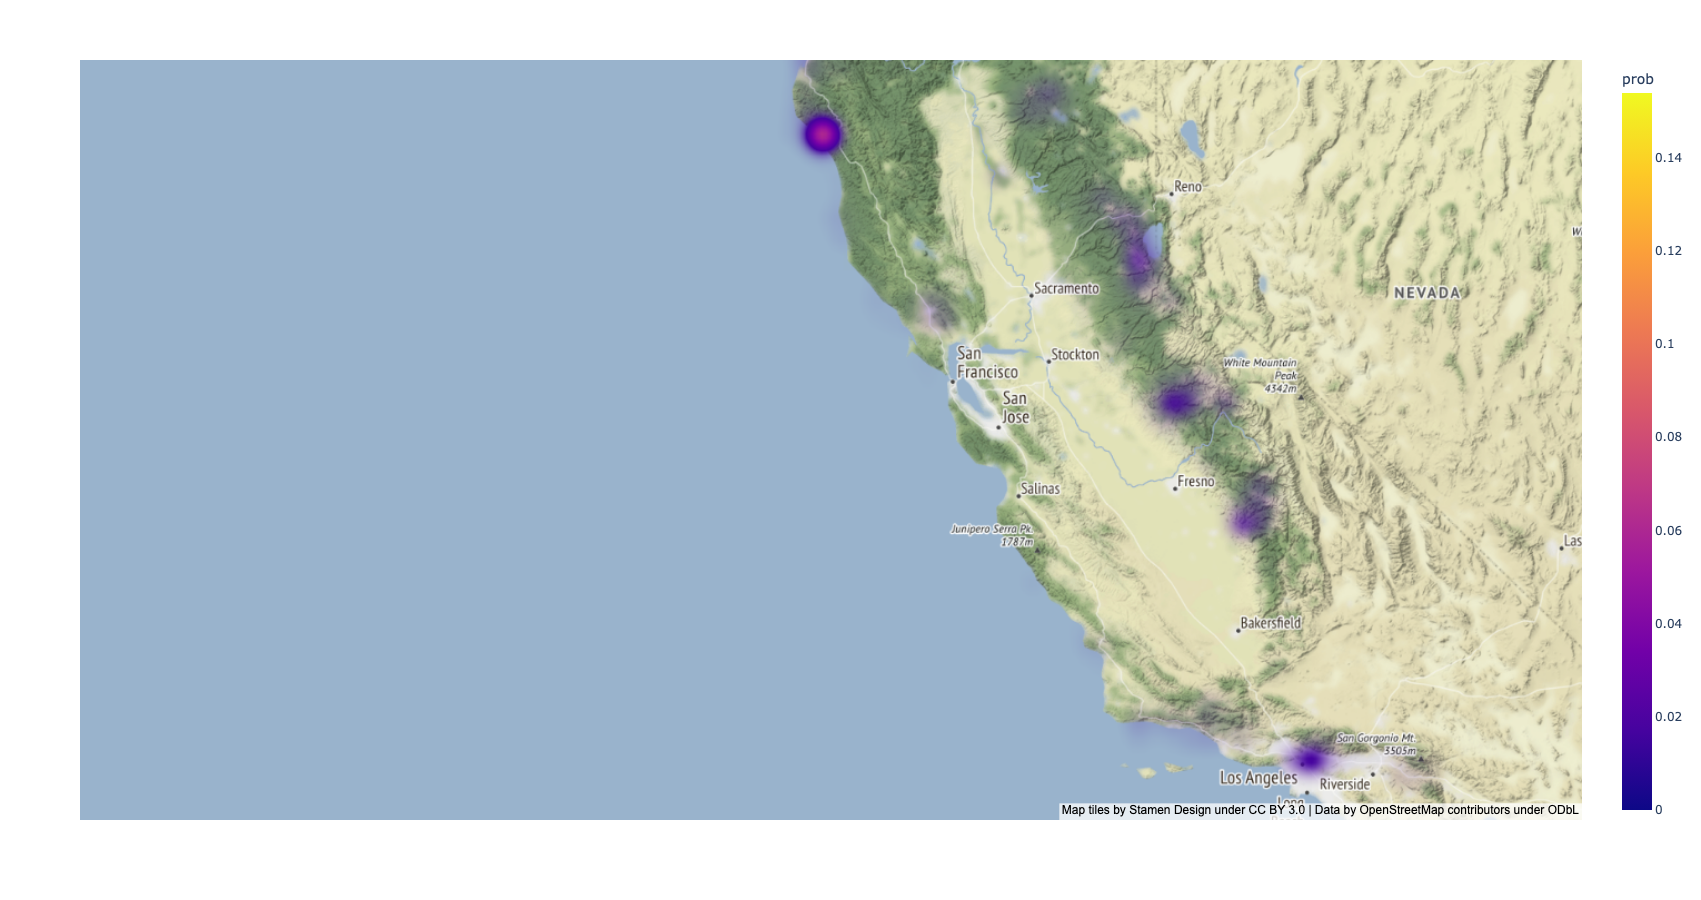

In [68]:
fig = px.density_mapbox(df_final, lat='lat', lon='lon', z='prob',
                        mapbox_style="stamen-terrain",
                       width=1200, height=900)
 
fig.show()

In [46]:
len(latlons)

361

In [40]:
df_latlons = pd.DataFrame()
df_latlons['lat'] = [x[0] for x in latlons]
df_latlons['lon'] = [x[1] for x in latlons]
df_latlons.head()

lat         lon
0  32.534231 -124.410607
1  32.727607 -124.410607
2  32.920983 -124.410607
3  33.114359 -124.410607
4  33.307735 -124.410607

In [41]:
df_final = df_counts.join(df_latlons, how='inner')
df_final.head(20)

quadrat      prob        lat         lon
39       129  0.001558  40.075898 -124.410607
40        71  0.000858  40.269274 -124.410607
41        54  0.000652  40.462650 -124.410607
87        52  0.000628  39.882522 -124.200889
88       191  0.002308  40.075898 -124.200889
89       572  0.006911  40.269274 -124.200889
90       391  0.004724  40.462650 -124.200889
91       583  0.007043  40.656027 -124.200889
92       998  0.012057  40.849403 -124.200889
93       242  0.002924  41.042779 -124.200889
94      1069  0.012915  41.236155 -124.200889
95       211  0.002549  41.429531 -124.200889
96       197  0.002380  41.622907 -124.200889
97        58  0.000701  41.816283 -124.200889
133       66  0.000797  39.302394 -123.991172
134        7  0.000085  39.495770 -123.991172
135       22  0.000266  39.689146 -123.991172
136      127  0.001534  39.882522 -123.991172
137    12739  0.153905  40.075898 -123.991172
138      145  0.001752  40.269274 -123.991172

In [29]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [30]:
point = Point(40.13048,-123.82166)
# polygon = Polygon(polygon)
print(polygon.contains(point))

True


In [20]:
us49['ALAND_miles'] = us49['ALAND']*3.86102e-7
us49['AWATER_miles'] = us49['AWATER']*3.86102e-7
us49['centroid'] = us49.centroid

data='ALAND_miles'
cmap='Spectral'
zoom=5
dpi=100

#w,s,e,n = states.total_bounds

us49.crs = "EPSG:4326"

f,ax = plt.subplots(1,1, figsize=(20,12), sharex=True, sharey=True, dpi=dpi)
f.tight_layout(pad=0.8)
ax.set_axis_off()
plt.title('US Map using Contextily',fontsize='large')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ux = us49.to_crs(epsg=3857).plot(data, ax=ax, edgecolor='k', cmap=cmap, alpha = 0.2, legend=True, cax=cax)
ctx.add_basemap(ux, zoom=zoom,source=ctx.providers.OpenStreetMap.Mapnik);
plt.ylabel('Million square miles', fontsize=12)
# Use savefig to save your map
plt.savefig('US Contextily Map with zoom = ' + str(zoom) +' .png')
plt.show()

NameError: name 'us49' is not defined

In [8]:
def statePlot(st,data,cmap,zoom,dpi):
    state = us49.loc[us49['STUSPS'] == st]
    state.crs = "EPSG:4326"
    f,ax = plt.subplots(1,1, figsize=(8,8), 
    sharex=True,sharey=True, dpi=dpi)
    f.tight_layout(pad=0.8)
    ax.set_axis_off()
    plt.title('Map using Contextily - ' + data,fontsize='large')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)
    ux = state.to_crs(epsg=3857).plot(data, ax=ax, 
    edgecolor='blue',    cmap=cmap, alpha = 0.2, 
    legend=True, cax=cax)
    ctx.add_basemap(ux,    zoom=zoom,
     source=ctx.providers.OpenStreetMap.Mapnik);
    plt.ylabel('Million square miles', fontsize=12)
    # Use savefig to save your map
    plt.savefig(
    'US Contextily Map with zoom = ' + str(zoom) +' .png')
    plt.show()

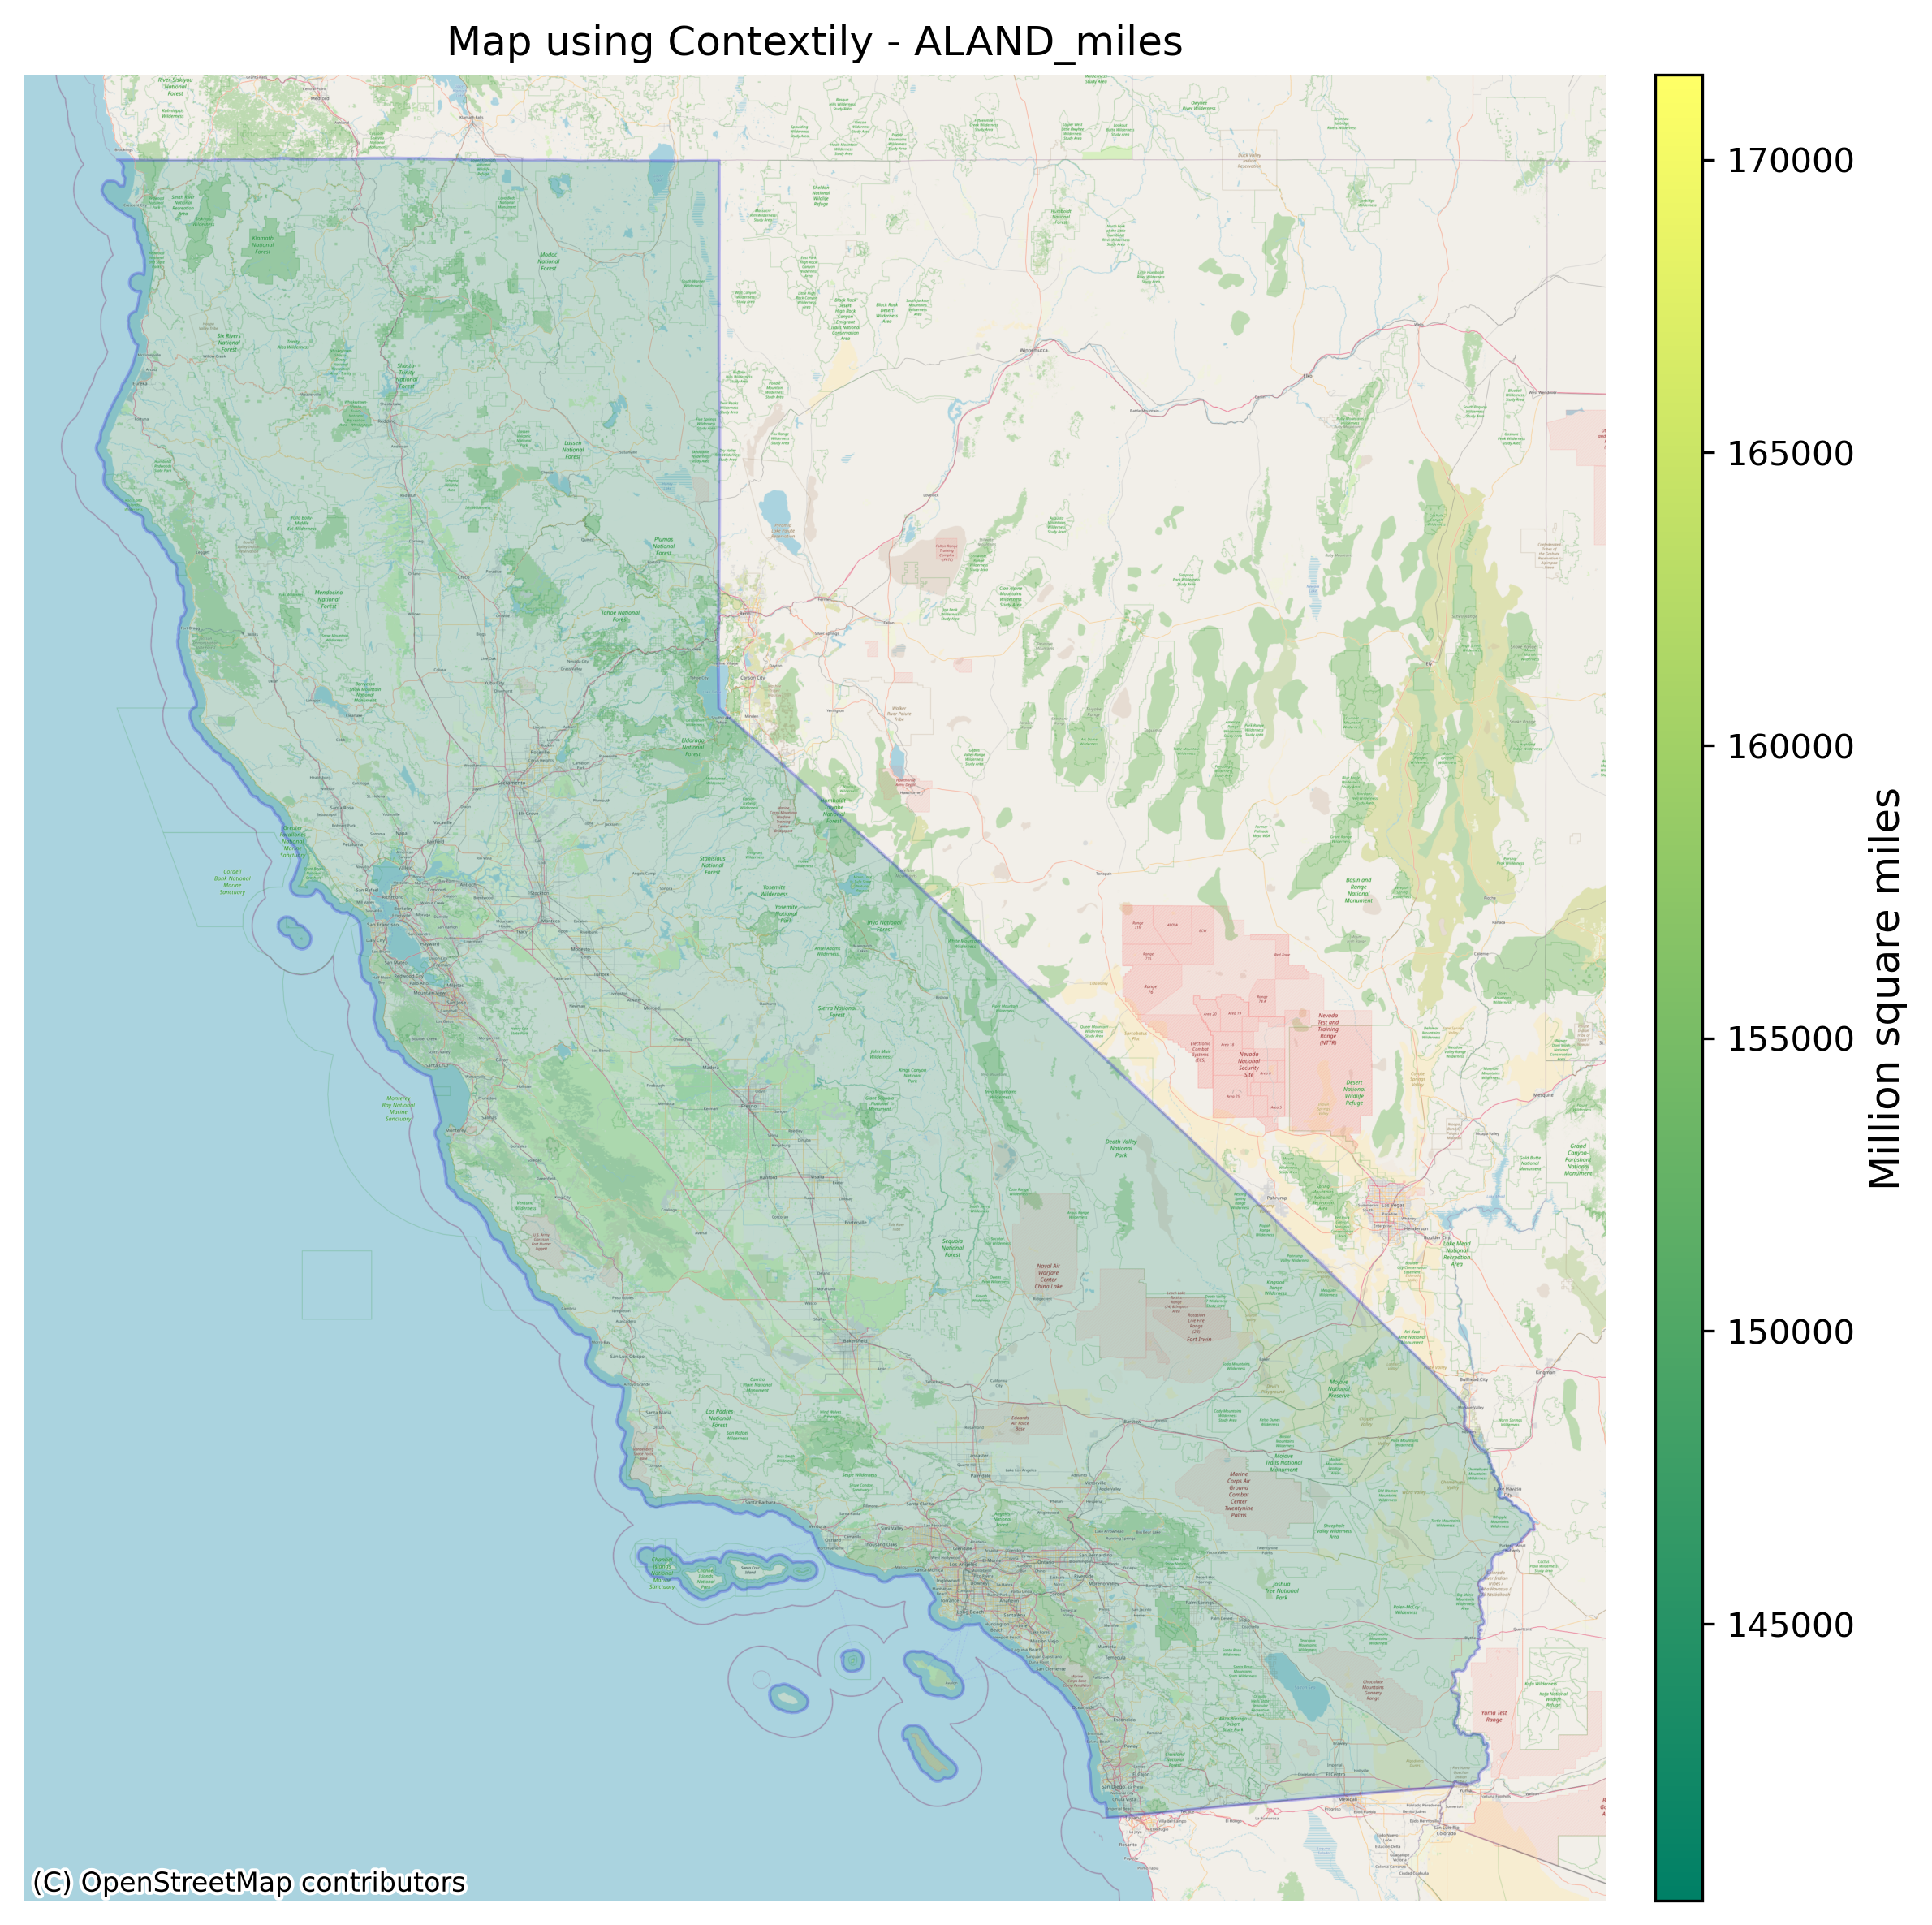

In [10]:
# statePlot('CA','ALAND_miles','summer',5,200)

statePlot('CA','ALAND_miles','summer',9,300) #factor=9, dpi=300